# Probability & Statistics 1

We will be using the  [National Survey of Family Growth 2013-2015 Data Set](https://www.cdc.gov/nchs/nsfg/nsfg_2013_2015_puf.htm) and following loosely the [Think Stats 2e](https://greenteapress.com/wp/think-stats-2e/) online book.

Our main question: Do first babies tend to arrive late?

First, let's take a look at the data and the context from the NSFG website. To work with data effectively, you need to 

1. figure out the data model (think ER diagram) of the data
2. take a look at the schema in the STATA dct file
3. "think on two levels at the same time: the level of statistics and the level of context."

Go through the key concepts in the glossary of ThinkStats2e Ch.1.

## 1. Working off a SQLite database

We will pretend that the data is too big to fit in memory and work off a DBMS this time in order to give you practice working with larger data sets using SQL. Please keep this in mind and try NOT to fetch the entire data set into memory -- only bring in a subset at a time.

Also, you will discover that this data set is not as well-behaved as the forest cover data set, so please check for:

1. Missing values
2. Wrong/suspicious values

Note that you might have to rerun cell 1 to re-establish the database connection after not working with the notebook for a while, otherwise your SQL queries may not execute.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sqlite3
import pprint

conn = sqlite3.connect('nsfg.db')
curs = conn.cursor()

# find distinct values for the birthwgt_lb1 column
curs.execute('SELECT DISTINCT(birthwgt_lb1) FROM fempreg ORDER BY birthwgt_lb1;')
print( np.array(curs.fetchall()).flatten() )

[None 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 17 98 99]


## 2. How to Create pandas.DataFrame from SQLite tables

If you are using the seaborn plotting package, you will need the data subset in a dataframe. Here's how to get data from SQL into a dataframe.

The pandas DataFrame is essentially a numpy 2D array augmented with column names, so
you will need 

1. the data in 2D array which sqlite3 already returns that, and 
2. the column names of the schema of the returned SQL result

The below example assumes all the columns of the fempreg table are returned.

In [ ]:
# you can get column names of the fempreg table from sqlite3 as follows
curs.execute('PRAGMA table_info(fempreg);')
colnames = [row[1] for row in curs.fetchall()]
#pprint.pprint(colnames)

# you can always construct a pandas data frame from the sql result as follows
# note that i did not check for errors
# if the data is big, make sure that the results will fit in memory
curs.execute('SELECT * FROM fempreg WHERE pregordr=1;')

df = pd.DataFrame(data=curs.fetchall(), columns=colnames)

# print descriptive statistics for each column
df.describe()

## 3. Exploring the univariate distributions

### a. Plot the histograms of the following variables:

* Birth weight Lb
* Birth weight Oz
* Pregnancy Lengths
* Mother's age at the end of the pregnancy

Some of the characteristics we might want to report are:

* central tendency: Do the values tend to cluster around a particular point?
* modes: Is there more than one cluster?
* spread: How much variability is there in the values?
* tails: How quickly do the probabilities drop as we move away from the modes?
* outliers: Are there extreme values far from the modes?



(6485,)


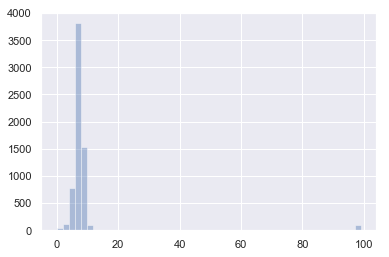

In [13]:
sns.set(color_codes=True)

attr = 'birthwgt_lb1'

curs.execute('SELECT ' + attr + ' FROM fempreg WHERE ' + attr + ' is not null;')
data =  np.array(curs.fetchall()).flatten()
print(data.shape)

sns.distplot(data, kde=False)

### b.  Plot the distribution of pregnancy length of first babies vs other.

* Partition the data by birth order (first vs other)
* Plot the distribution of each partition on the same plot
* How do we interpret these plots?

(3067,)
(3422,)


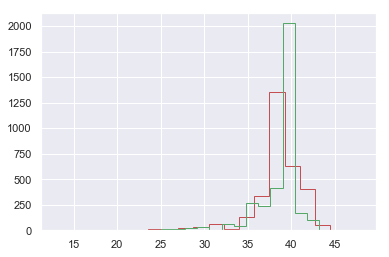

In [19]:
attr = 'prglngth'

curs.execute('SELECT ' + attr + ' FROM fempreg WHERE ' + attr + ' is not null and birthord=1;')
data =  np.array(curs.fetchall()).flatten()
print(data.shape)

sns.distplot(data, bins=20, kde=False, hist_kws={"histtype": "step", "linewidth": 1,\
                                        "alpha": 1, "color":"r"})

curs.execute('SELECT ' + attr + ' FROM fempreg WHERE ' + attr + ' is not null and birthord>1;')
data =  np.array(curs.fetchall()).flatten()
print(data.shape)

sns.distplot(data, bins=20, kde=False, hist_kws={"histtype": "step", "linewidth": 1,\
                                        "alpha": 1, "color":"g"})

### c. Find the mean, standard deviation, and variance of pregnancy length. 

* Find these summary statistics for each partition.
* How do we interpret these?


### d. Write a function to compute Cohen's d statistic for *effect size*

$d = \frac{\bar{x}_1 - \bar{x}_2}{s}$ where $s = \sqrt{\frac{n_1 \cdot \sigma_1^2 + n_2 \cdot \sigma_2^2}{n_1 + n_2}}$

* What is the intuition behind Cohen's d statistic?
* Calculate the effect size for pregnancy length for first vs other babies.



### e. Go through the key concepts in the glossary of ThinkStats2e Ch.2.

## Exercise

Question: are first babies lighter or heavier than others?